<a href="https://colab.research.google.com/github/EdBerg21/AI-Professional-Prompts/blob/main/leaf_of_hrnet_semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2022 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Copyright 2022 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/hub/tutorials/hrnet_semantic_segmentation"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/hub/tutorials/hrnet_semantic_segmentation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/hub/tutorials/hrnet_semantic_segmentation.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/hub/tutorials/hrnet_semantic_segmentation.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/google/HRNet/"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>
</table>

# HRNet based model for semantic segmentation

In this notebook, you will:

- Choose and load one of the 17 pre-trained HRNet models on different semantic segmentation datasets
- Run inference to extract features from the model backbone and predictions from the model head

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## Loading models from TensorFlow Hub

Here you can choose the pre-trained HRNet model to load, different models means a different training dataset used. All models have the same architecture, except for the model head, which has a different dimension based on the number of classes contained in the training dataset (dataset_output_classes). For more information about the different datasets we refer to the links above and the [factors of influence dataset collection](https://github.com/google-research/google-research/tree/master/factors_of_influence).

In [ ]:
#@title Choose a pre-trained HRNet model to load.

hrnet_model_name = 'ade20k-hrnetv2-w48/1'  #@param ["ade20k-hrnetv2-w48/1", "isprs-hrnetv2-w48/1", "vkitti2-hrnetv2-w48/1", "vgallery-hrnetv2-w48/1", "sunrgbd-hrnetv2-w48/1", "suim-hrnetv2-w48/1", "scannet-hrnetv2-w48/1", "pvoc-hrnetv2-w48/1", "msegpcontext-hrnetv2-w48/1", "mapillary-hrnetv2-w48/1", "kitti-hrnetv2-w48/1", "isaid-hrnetv2-w48/1", "idd-hrnetv2-w48/1", "coco-hrnetv2-w48/1", "city-hrnetv2-w48/1", "camvid-hrnetv2-w48/1", "bdd-hrnetv2-w48/1"]

tfhub_model_name = 'https://tfhub.dev/google/HRNet/' + hrnet_model_name

print('HRNet model selected           :', tfhub_model_name)

HRNet model selected           : https://tfhub.dev/google/HRNet/ade20k-hrnetv2-w48/1


In [ ]:
hrnet_model = hub.load(tfhub_model_name)

print('HRNet model loaded           :', tfhub_model_name)

HRNet model loaded           : https://tfhub.dev/google/HRNet/ade20k-hrnetv2-w48/1


## Loading an image and running inference

This is a demonstration on how to run inference for extracting features and predictions from an image. The image was taken from the scene150 dataset.

To perform inference on the datasets that were used during training we refer to the [factors of influence dataset collection](https://github.com/google-research/google-research/tree/master/factors_of_influence).

In [ ]:
img_file = tf.keras.utils.get_file(origin="https://tensorflow.org/images/bedroom_hrnet_tutorial.jpg")
img = np.array(Image.open(img_file))/255.0

67460/67460 [==============================] - 0s 4us/step


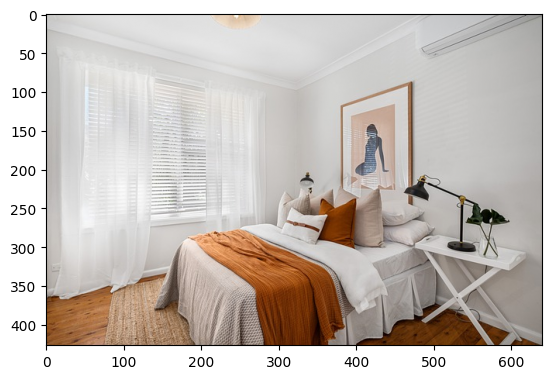

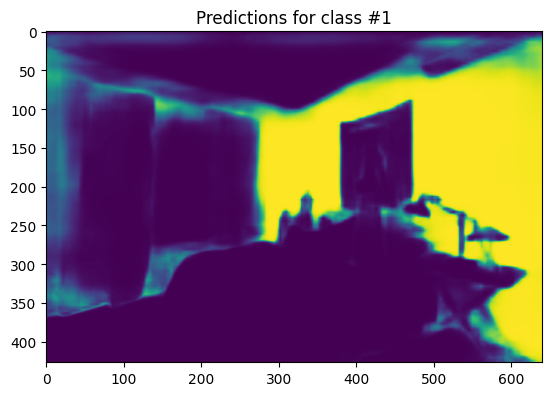

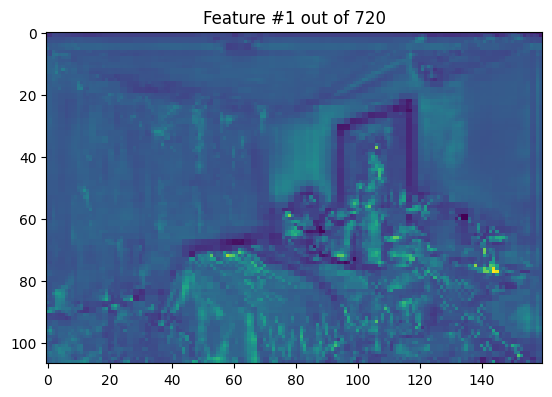

In [ ]:
plt.imshow(img)
plt.show()

# Predictions will have shape (batch_size, h, w, dataset_output_classes)
predictions = hrnet_model.predict([img])
plt.imshow(predictions[0,:,:,1])
plt.title('Predictions for class #1')
plt.show()
# Features will have shape (batch_size, h/4, w/4, 720)
features = hrnet_model.get_features([img])
plt.imshow(features[0,:,:,1])
plt.title('Feature #1 out of 720')
plt.show()